In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import pickle
from functools import reduce
from dateutil.relativedelta import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
from helpers import load, plot, analyse

plot.ERC_Management().set_plot_params()
fig_width = 6.33

In [3]:
## Load data
start_date = '2023-02-08 12:00:00' #gut um nans zu zeigen
end_date = '2023-02-08 18:00:00'
#start_date = '2022-06-01 01:00:00' #gut um nans zu zeigen
#end_date = '2022-06-05 02:05:00'
data_raw = load.load_raw_data(start_date, end_date, masked=True)
new_time_interval = '300S'

In [4]:
## Februar Daten haben alles, um den Effekt vom Resampling zu analysieren: am Anfang an-aus (Volumenstrom), danach konstanter Volumenstrom mit hoch und runter in der Temperatur. 

In [5]:
#df_mean = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in']))

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [7]:
data_mean = data_raw.resample(new_time_interval).mean()

(None,
 <Axes: title={'center': 'BHE 02'}, xlabel='Time', ylabel='Fluid temperature [°C]'>)

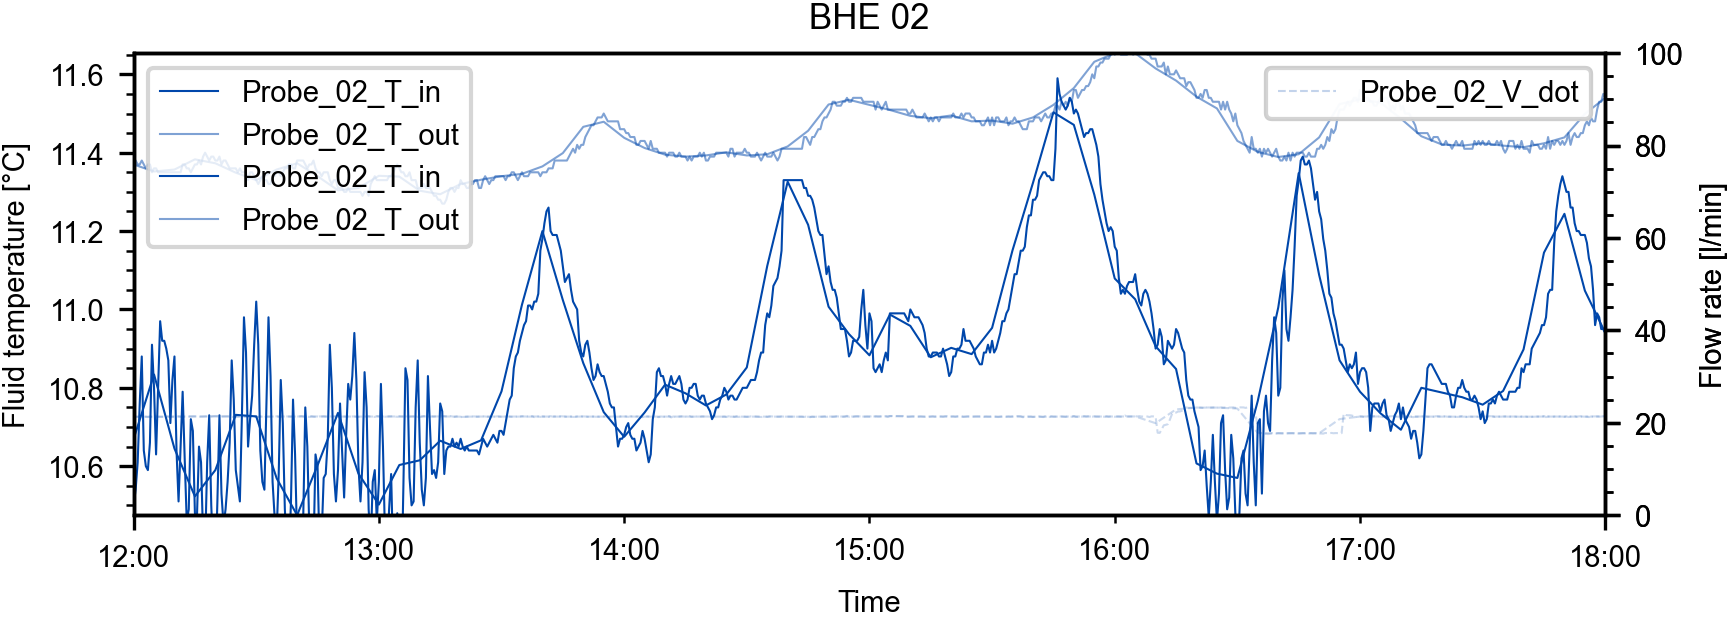

In [8]:
fig, ax = plot.plot_one_BHE(data_raw, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5)
plot.plot_one_BHE(data_mean, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5, ax=ax)

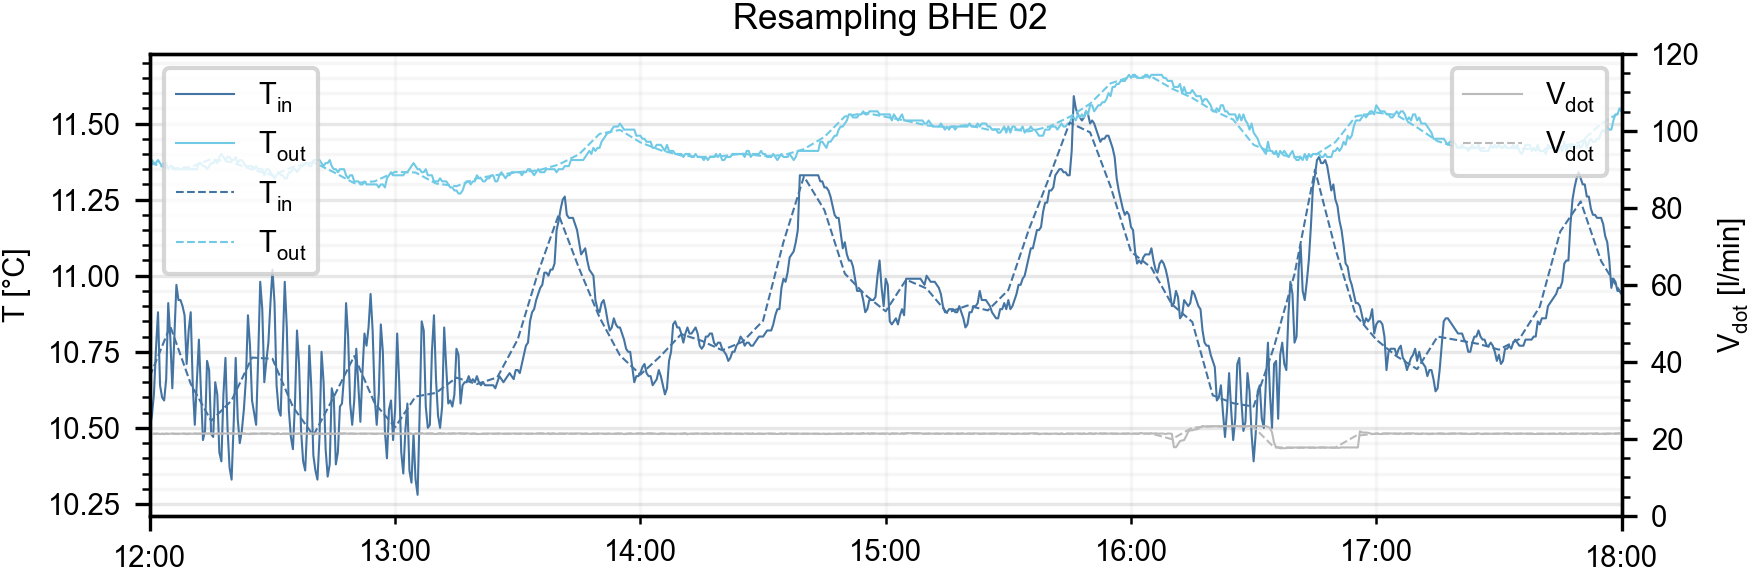

In [19]:
colors= ['#4474A2', '#70CAE6']
linewidth=.5
probe='02'

all_color_dict = plot.ERC_Management().create_colordict(probe_strings=False)
titlestr = ''
fig, ax = plt.subplots(1,1,figsize=(fig_width, 2), dpi=300)
ax2 = ax.twinx()

data_raw.plot(ax=ax, y = f'Probe_{probe}_T_in', linewidth=linewidth, color=colors[0], label='$\mathregular{T_{in}}$')
data_raw.plot(ax=ax, y = f'Probe_{probe}_T_out', linewidth=linewidth, color=colors[1], label='$\mathregular{T_{out}}$')
data_raw.plot(ax=ax2, y= f'Probe_{probe}_V_dot', linewidth=linewidth, color='#BABABA', label='$\mathregular{V_{dot}}$')

data_mean.plot(ax=ax, y = f'Probe_{probe}_T_in', linewidth=linewidth, color=colors[0], label='$\mathregular{T_{in}}$', linestyle='--')
data_mean.plot(ax=ax, y = f'Probe_{probe}_T_out', linewidth=linewidth, color=colors[1], label='$\mathregular{T_{out}}$', linestyle='--')
data_mean.plot(ax=ax2, y= f'Probe_{probe}_V_dot', linewidth=linewidth, color='#BABABA', label='$\mathregular{V_{dot}}$', linestyle='--')

vdot_ymax = 120


#ax.set_xlim('2022-06-25 00:00:00', '2022-06-30 00:00:00')
#plt.savefig('../Grafiken/O_data_preparation_mask.pdf', bbox_inches='tight')

ax2.legend(loc='upper right')
ax.legend(loc='upper left')

# Re-arrange legends to last axis
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)
        
ax.set_xlim(start_date, end_date)
ax.set_title(f' Resampling BHE {probe}')

ax2.set_ylim(0,120)
ax2.set_ylabel('$\mathregular{V_{dot}}$ [l/min]')

ax.grid(alpha=.3, which='major')
ax.grid(alpha=.1, which='minor')
ax.set_ylabel('T [°C]')
ax.set_xlabel('')
fig.savefig('Resampling.pdf', bbox_inches='tight')